In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load datasets
application_data_path = '/content/application_data.csv'
previous_application_path = '/content/previous_application.csv'

In [ ]:
application_data = pd.read_csv(application_data_path)
previous_application = pd.read_csv(previous_application_path)

In [ ]:
# Display basic information
print("Application Data Info:")
print(application_data.info())
print("\nPrevious Application Data Info:")
print(previous_application.info())

Application Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19502 entries, 0 to 19501
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(90), int64(16), object(16)
memory usage: 18.2+ MB
None

Previous Application Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45634 entries, 0 to 45633
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   45634 non-null  int64  
 1   SK_ID_CURR                   45634 non-null  int64  
 2   NAME_CONTRACT_TYPE           45634 non-null  object 
 3   AMT_ANNUITY                  35978 non-null  float64
 4   AMT_APPLICATION              45634 non-null  float64
 5   AMT_CREDIT                   45634 non-null  float64
 6   AMT_DOWN_PAYMENT             22515 non-null  float64
 7   AMT_GOODS_PRICE              35834 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   45634 non-n

In [ ]:
# Checking for missing values
missing_values = application_data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Missing Values in Application Data:")
print(missing_values)

Missing Values in Application Data:
COMMONAREA_MEDI             13641
COMMONAREA_MODE             13641
COMMONAREA_AVG              13641
NONLIVINGAPARTMENTS_MEDI    13534
NONLIVINGAPARTMENTS_MODE    13534
                            ...  
FLAG_DOCUMENT_5                 1
FLAG_DOCUMENT_4                 1
FLAG_DOCUMENT_3                 1
FLAG_DOCUMENT_2                 1
FLAG_DOCUMENT_10                1
Length: 93, dtype: int64


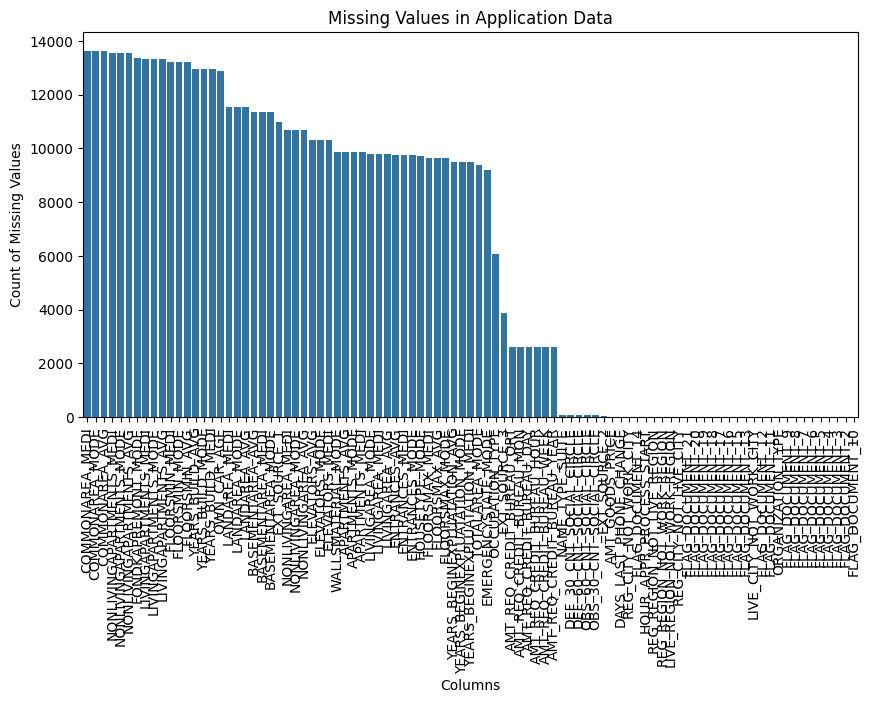

In [ ]:
# Visualizing missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title("Missing Values in Application Data")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.show()

In [ ]:
# Handling missing values (Example: Dropping columns with more than 50% missing values)
thresh = len(application_data) * 0.5
application_data_cleaned = application_data.dropna(thresh=thresh, axis=1)
print("Shape after dropping columns with >50% missing values:", application_data_cleaned.shape)


Shape after dropping columns with >50% missing values: (19502, 82)


In [ ]:
application_data_cleaned.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


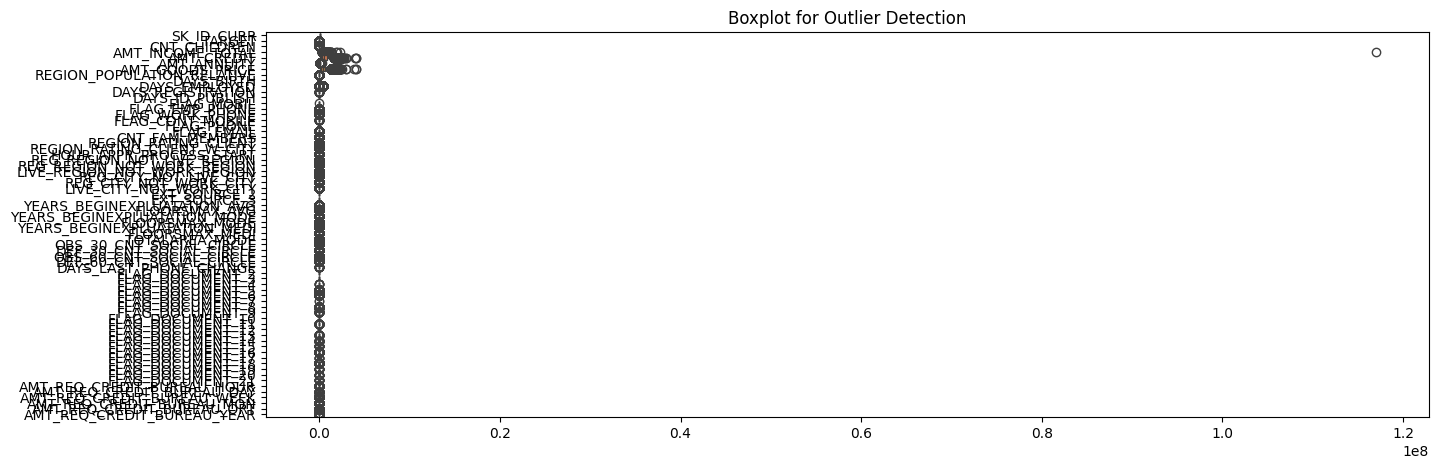

In [ ]:
# Outlier Detection using Boxplot
numerical_cols = application_data_cleaned.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15, 5))
sns.boxplot(data=application_data_cleaned[numerical_cols], orient="h")
plt.title("Boxplot for Outlier Detection")
plt.show()


In [ ]:
# Fill missing numerical values with median, avoiding SettingWithCopyWarning
for col in application_data_cleaned.select_dtypes(include=np.number).columns:
    application_data_cleaned.loc[:, col] = application_data_cleaned.loc[:, col].fillna(application_data_cleaned.loc[:, col].median())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Identify outliers using Interquartile Range (IQR)
# Select only numerical columns for IQR calculation
numerical_application_data_cleaned = application_data_cleaned.select_dtypes(include=np.number)

Q1 = numerical_application_data_cleaned.quantile(0.25)
Q3 = numerical_application_data_cleaned.quantile(0.75)
IQR = Q3 - Q1

# Capping extreme values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip values only in numerical columns, avoiding SettingWithCopyWarning
# AND cast to the original dtype to avoid FutureWarnings
for col in numerical_application_data_cleaned.columns:
    original_dtype = application_data_cleaned[col].dtype  # Get original dtype
    clipped_values = application_data_cleaned.loc[:, col].clip(lower=lower_bound[col], upper=upper_bound[col])
    application_data_cleaned.loc[:, col] = clipped_values.astype(original_dtype)  # Cast to original dtype before assigning

In [ ]:
application_data_cleaned

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19497,122737,0,Cash loans,M,Y,Y,0.0,270000.0,484861.5,35410.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19498,122738,0,Cash loans,F,N,Y,0.0,247500.0,1354500.0,50328.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
19499,122739,0,Revolving loans,F,Y,Y,1.0,112500.0,270000.0,13500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
19500,122740,0,Cash loans,M,N,N,0.0,117000.0,382500.0,23242.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


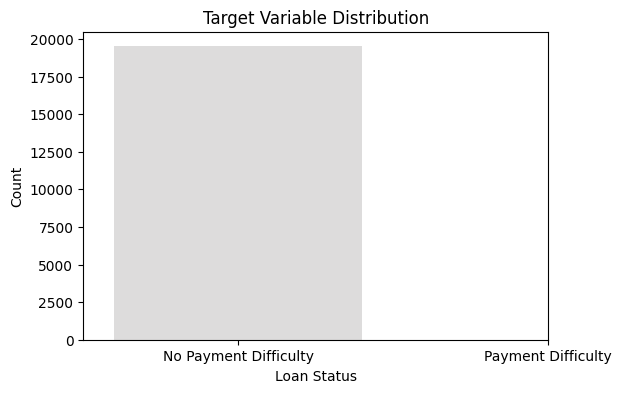

In [ ]:
# Data Imbalance Analysis
target_counts = application_data_cleaned['TARGET'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=target_counts.index, y=target_counts.values, hue=target_counts.index, palette='coolwarm', legend=False)
plt.xticks([0, 1], ['No Payment Difficulty', 'Payment Difficulty'])
plt.title("Target Variable Distribution")
plt.ylabel("Count")
plt.xlabel("Loan Status")
plt.show()



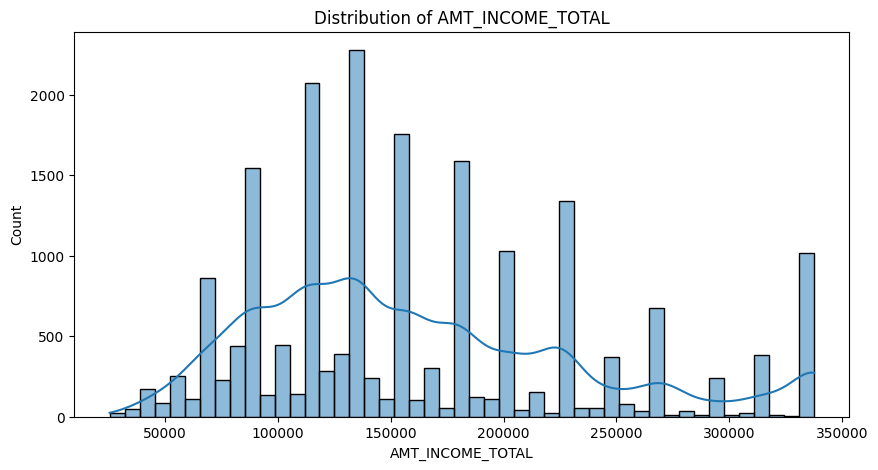

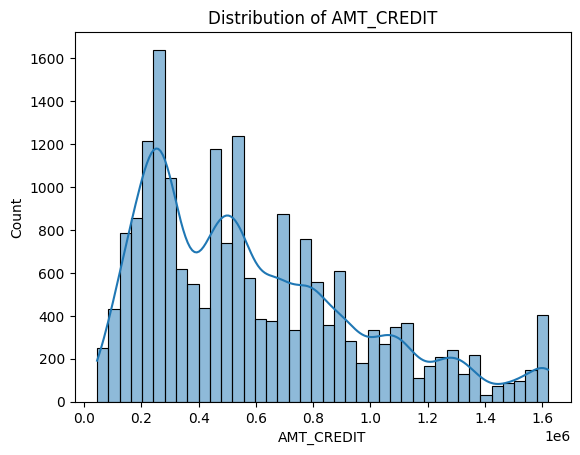

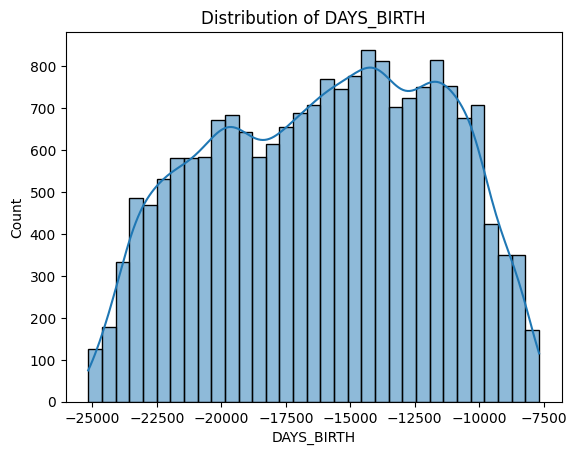

In [ ]:
# Univariate Analysis
plt.figure(figsize=(10, 5))
for col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH']:
    sns.histplot(application_data_cleaned[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()




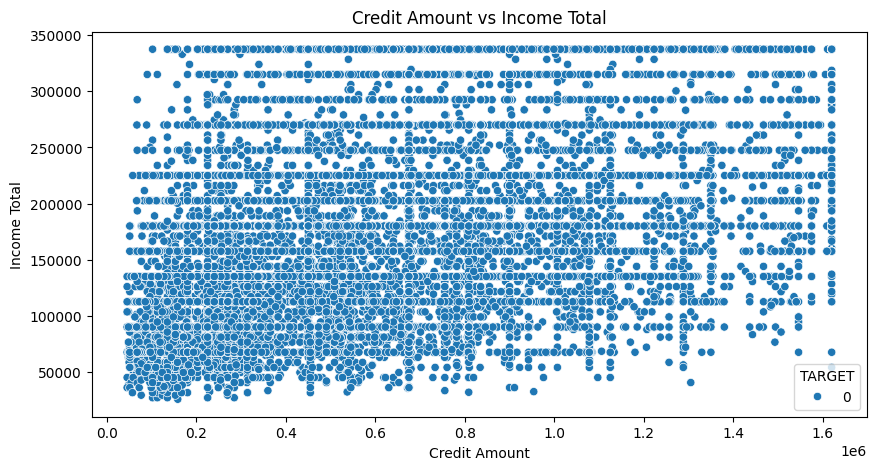

In [ ]:
# Bivariate Analysis
plt.figure(figsize=(10, 5))
sns.scatterplot(x=application_data_cleaned['AMT_CREDIT'], y=application_data_cleaned['AMT_INCOME_TOTAL'], hue=application_data_cleaned['TARGET'])
plt.title("Credit Amount vs Income Total")
plt.xlabel("Credit Amount")
plt.ylabel("Income Total")
plt.show()

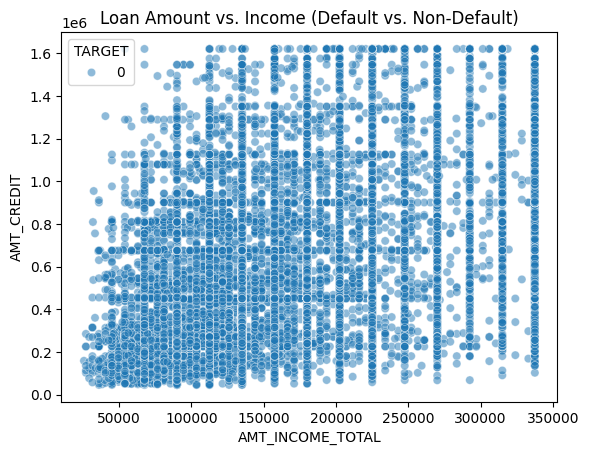

In [ ]:
# Scatter plot: Loan Amount vs. Income
sns.scatterplot(data=application_data_cleaned, x="AMT_INCOME_TOTAL", y="AMT_CREDIT", hue="TARGET", alpha=0.5) # Changed app_data_cleaned to application_data_cleaned
plt.title("Loan Amount vs. Income (Default vs. Non-Default)")
plt.show()

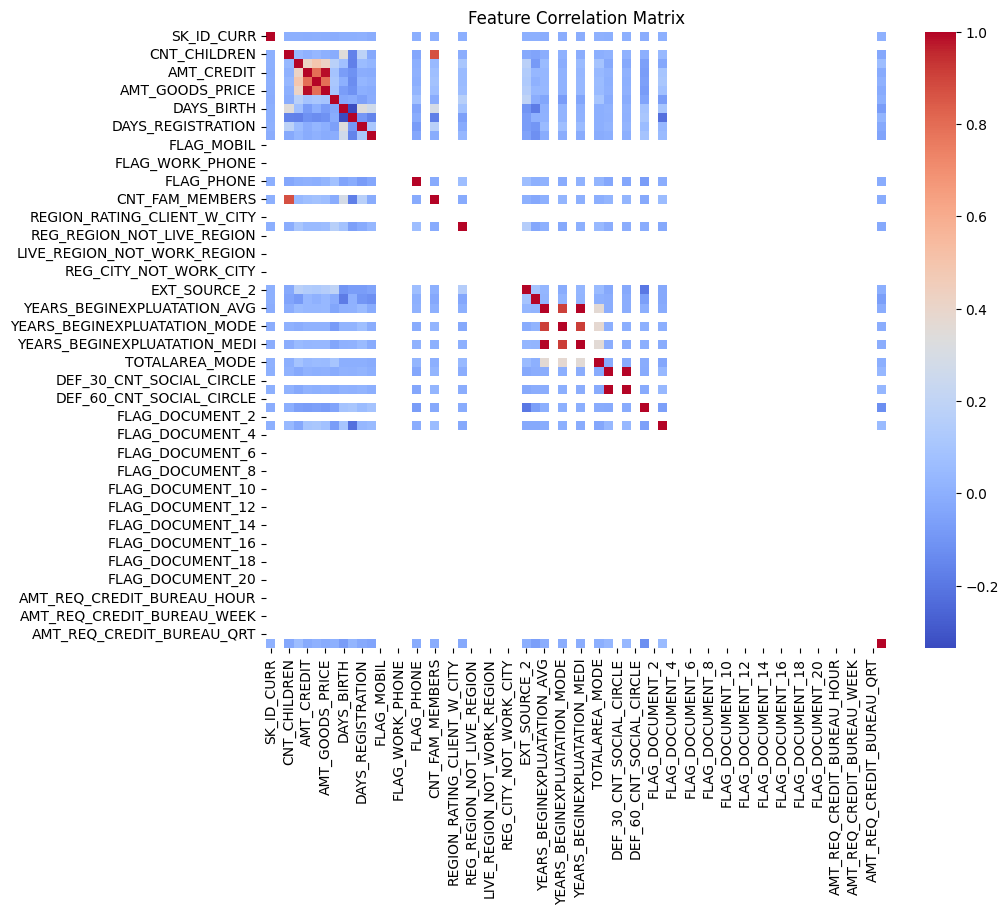

In [ ]:
# Correlation Analysis
# Select only numerical features for correlation analysis
numerical_features = application_data_cleaned.select_dtypes(include=np.number)

# Calculate correlation matrix
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
# Assuming 'application_data_cleaned' is the DataFrame to be saved:
df = application_data_cleaned  # Assign the application_data_cleaned DataFrame to the variable df
file_name = "cleaned_data.xlsx"
df.to_excel(file_name, index=False)

In [ ]:
application_data_cleaned

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19497,122737,0,Cash loans,M,Y,Y,0.0,270000.0,484861.5,35410.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19498,122738,0,Cash loans,F,N,Y,0.0,247500.0,1354500.0,50328.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
19499,122739,0,Revolving loans,F,Y,Y,1.0,112500.0,270000.0,13500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
19500,122740,0,Cash loans,M,N,N,0.0,117000.0,382500.0,23242.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
